In [1]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt

import pickle

from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU, GlobalAveragePooling1D, Flatten, BatchNormalization
from tensorflow.keras import regularizers

In [2]:
import sys

sys.path.append('../utils')

In [3]:
from predict import predict_class

In [4]:
TOKENIZER_PATH = '../learned_models'

X_TRAIN_PATH = '../data/x_train.json'
Y_TRAIN_PATH = '../data/y_train.json'

X_TEST_PATH = '../data/x_test.json'
Y_TEST_PATH = '../data/y_test.json'

In [5]:
with open(f'{TOKENIZER_PATH}/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [6]:
x_train = pd.read_json(X_TRAIN_PATH).values
y_train = pd.read_json(Y_TRAIN_PATH)

x_test = pd.read_json(X_TEST_PATH).values
y_test = pd.read_json(Y_TEST_PATH)

In [7]:
x_train, y_train

(array([[1225,  319,   53, ..., 1825,   75,   61],
        [   0,    0,    0, ...,  532, 1994,    2],
        [   0,    0,    0, ...,  144, 1119,   47],
        ...,
        [   0,    0,    0, ..., 1395,   92, 2071],
        [   0,    0,    0, ..., 3464,   11,    8],
        [   0,    0,    0, ..., 1360,    8,    5]]),
       0  1  2
 0     0  0  1
 1     1  0  0
 2     0  0  1
 3     0  0  1
 4     0  1  0
 ...  .. .. ..
 3187  0  0  1
 3188  0  0  1
 3189  0  0  1
 3190  0  0  1
 3191  0  0  1
 
 [3192 rows x 3 columns])

In [8]:
[np.mean([len(subarr) for subarr in x_train])]

[100.0]

In [9]:
NUM_WORDS = 5_000                                 # Максимальное количество слов
MAX_NEWS_LEN = 100                                # Максимальная длина новости
NB_CLASSES = y_train.keys().shape[0]              # Количество классов

In [10]:
EMBEDDING_DIM = 32

In [11]:
# model_lstm = Sequential()
# model_lstm.add(Embedding(NUM_WORDS, EMBEDDING_DIM, input_length=MAX_NEWS_LEN))
# # model_lstm.add(LSTM(64, return_sequences=True))
# model_lstm.add(LSTM(16))
# model_lstm.add(Dense(NB_CLASSES, activation='softmax'))

# model_lstm = Sequential()
# model_lstm.add(Embedding(NUM_WORDS, EMBEDDING_DIM, input_length=MAX_NEWS_LEN))
# model_lstm.add(LSTM(1024, kernel_regularizer=regularizers.l2(0.64)))  # применяем L2 регуляризацию к весам
# model_lstm.add(Dense(NB_CLASSES, activation='softmax'))


model_lstm = Sequential()
model_lstm.add(Embedding(NUM_WORDS, EMBEDDING_DIM, input_length=MAX_NEWS_LEN))
model_lstm.add(LSTM(256, kernel_regularizer=regularizers.l2(0.6)))  # применяем L2 регуляризацию к весам
model_lstm.add(Dense(NB_CLASSES, activation='softmax'))


/opt/anaconda3/envs/python-3-10-14-base-backend-ml/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# history_lstm = model_lstm.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1) # Wow, good, but bad with RZD
# history_lstm = model_lstm.fit(x_train, y_train, epochs=12, batch_size=256, validation_split=0.2) # Wow, good, but bad with RZD
history_lstm = model_lstm.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.4617 - loss: 31.9199 - val_accuracy: 0.3474 - val_loss: 16.5485
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.6725 - loss: 13.0054 - val_accuracy: 0.4288 - val_loss: 6.0624
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.6606 - loss: 4.7280 - val_accuracy: 0.4131 - val_loss: 2.3776
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.6762 - loss: 1.7647 - val_accuracy: 0.5837 - val_loss: 1.1396
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.7178 - loss: 0.8676 - val_accuracy: 0.5681 - val_loss: 0.9543
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.7263 - loss: 0.7153 - val_accuracy: 0.4930 - val_loss: 0.7894
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.8036 - loss: 0.5073 - val_accuracy: 0.6886 - val_loss: 0.7069
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.8011 - loss: 0.4499 - val_accuracy:

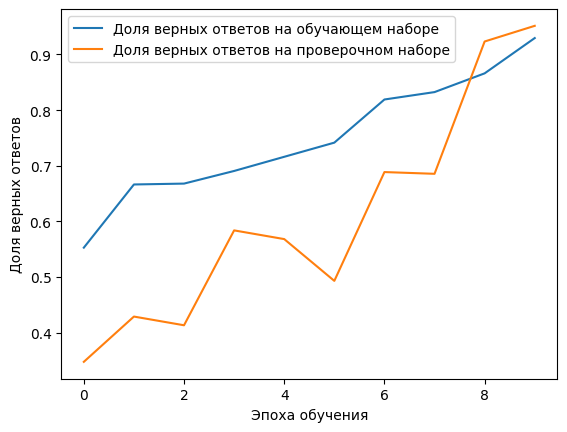

In [15]:
plt.plot(history_lstm.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

plt.legend()
plt.show()

In [16]:
model_lstm.evaluate(x_test, y_test, verbose=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9101 - loss: 0.3270


[0.3100666403770447, 0.909385085105896]

In [17]:
def count_aprox_words(text):
    return len(text.split(' '))

In [18]:
text = 'В Ялте гаишникам пришлось гнаться за пьяным водителем и стрелять по колёсам, чтобы его остановить На патрулировании в ночи полицейские заметили авто с выключенными фарами. Водитель не остановился по требованию, началась погоня. После опасных заносов и виляний правоохранители приняли решение стрелять: один в воздух и семь — по колёсам. Только тогда тачка остановилась.'

print(count_aprox_words(text))

predict_class(model_lstm, tokenizer, text, y_train, MAX_NEWS_LEN)

53
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


'АВТО БАТЯ'

In [19]:
text = 'Ещё один радостный повод в первые дни лета 😎 Хаб Группы в Красноярске отметил 3 года! 🥳 ✈Сейчас из Международного аэропорта Красноярск им. Д.А. Хворостовского (https://t.me/kja_inform) мы выполняем полёты по 32 направлениям с учётом Москвы. 📍В летнем расписании еженедельно осуществляем до 42 рейсов в столицу, до 14 рейсов в Санкт-Петербург, Иркутск, Новосибирск, до 13 рейсов в Сочи, до 10 рейсов в Благовещенск. 🌍Широкая сеть маршрутов из сердца Сибири включает зарубежные пункты: Алматы, Бангкок, Бишкек, Пхукет, Харбин, Астана, Ош, Пекин, Санья, Ташкент.'

print(count_aprox_words(text))

predict_class(model_lstm, tokenizer, text, y_train, MAX_NEWS_LEN)

78
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


'АЭРОФЛОТ'

In [20]:
text = 'Интегрировали станцию Кутузовская МЦД-4 с метро и МЦК  Первыми по новому крытому пешеходному мосту прошли мэр Москвы Сергей Собянин, глава РЖД Олег Белозёров и глава Сбербанка России Герман Греф. Переход сделали в едином стиле со станцией Кутузовская, чтобы он гармонично сочетался и с железнодорожной инфраструктурой, и с окружающей застройкой.'

print(count_aprox_words(text))

predict_class(model_lstm, tokenizer, text, y_train, MAX_NEWS_LEN)

50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


'Телеграмма РЖД'

In [22]:
SAVE_MODEL_PATH = '../learned_models'

save_model(model_lstm, f'{SAVE_MODEL_PATH}/model_lstm.h5')